
# Лабораторная 3

## Вариант 6

## Задача 1

Цепь Маркова с дискретным временем

Одноканальная система -> один сервер

In [2]:
Variant<-6
set.seed(Variant) 
k<-sample(c(4:9),1)
pp1<-runif(4)
pp2<-runif(3)
pp3<-runif(2)
p1<-pp1/sum(pp1)
p2<-c(c(0),pp2/sum(pp2))
p3<-c(c(0,0),pp3/sum(pp3))
p4<-c(0,0,0,1)
P<-data.frame()
P<-rbind(P,p1)
P<-rbind(P,p2)
P<-rbind(P,p3)
P<-rbind(P,p4)
rownames(P)<-c("p1","p2","p3","p4")
colnames(P)<-c("","","","")
View(P)
print(paste("k=",as.character(k)))

p1 0.3923892 0.1106274 0.1590636 0.3379198
p2 0.0000000 0.3624192 0.3549557 0.2826250
p3 0.0000000 0.0000000 0.8876956 0.1123044
p4 0.0000000 0.0000000 0.0000000 1.0000000

[1] "k= 8"


### Граф состояний


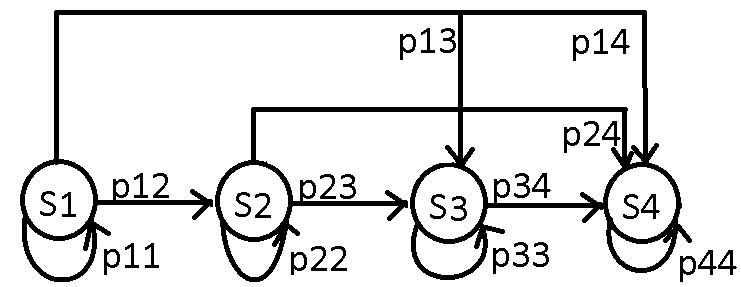

### Теоретическое решение

начальное состояние - S1 => начальный вектор p0 = (1, 0, 0, 0)

In [3]:
P_matrix<-data.matrix(P); P_matrix
p0<-matrix(c(1, 0, 0, 0), ncol=4, nrow=1, byrow=TRUE); p0


p1 0.3923892 0.1106274 0.1590636 0.3379198
p2 0.0000000 0.3624192 0.3549557 0.2826250
p3 0.0000000 0.0000000 0.8876956 0.1123044
p4 0.0000000 0.0000000 0.0000000 1.0000000

[,1] [,2] [,3] [,4]
[1,] 1    0    0    0

In [4]:
library(matrixcalc)

# подсчет гистаграммы состояний для N эксперементов по k проверок
print(paste0('k=', k-2))
matrix(c(1:4, p0 %*% matrix.power(P_matrix,k-2)), ncol=4, byrow=T)

print(paste0('k=', k-1))
matrix(c(1:4, p0 %*% matrix.power(P_matrix,k-1)), ncol=4, byrow=T)

print(paste0('k=', k))
matrix(c(1:4, p0 %*% matrix.power(P_matrix,k)), ncol=4, byrow=T)

[1] "k=6"


[,1]        [,2]        [,3]      [,4]     
[1,] 1.000000000 2.000000000 3.0000000 4.0000000
[2,] 0.003650079 0.005108872 0.2258142 0.7654269

[1] "k=7"


[,1]        [,2]        [,3]      [,4]     
[1,] 1.000000000 2.000000000 3.0000000 4.0000000
[2,] 0.001432251 0.002255352 0.2028483 0.7934641

[1] "k=8"


[,1]     [,2]         [,3]      [,4]     
[1,] 1.000000 2.0000000000 3.0000000 4.0000000
[2,] 0.000562 0.0009758292 0.1810959 0.8173663

### Статистический эксперимент

In [5]:
# i - индекс текущего состояния
Dice<-function(i) {
  intervals <- P[paste0('p',as.character(i)),]
  # или так
  # intervals <- P[i,]
  # print(intervals)
  r <- runif(1)
  dice <- 0
  # индекс следующего состония
  j <- i - 1
  while ((j < length(intervals)) & (dice < r)) {
    j <- j + 1
    dice <- dice + intervals[j]
  }
  return(j)
}

In [6]:
state_idx <- 1
for (i in 1:k) {
  print(paste('проверка', i, '| состояние', paste0('S', state_idx)))
  state_idx <- Dice(state_idx)
} 


[1] "проверка 1 | состояние S1"
[1] "проверка 2 | состояние S3"
[1] "проверка 3 | состояние S4"
[1] "проверка 4 | состояние S4"
[1] "проверка 5 | состояние S4"
[1] "проверка 6 | состояние S4"
[1] "проверка 7 | состояние S4"
[1] "проверка 8 | состояние S4"


In [7]:
N = 1000

exp1 <- function(k) {
  dices <- vector(mode='integer', length=N)
  for (i in 1:N) {
    state_idx <- 1
    for (j in 1:k) {
      state_idx <- Dice(state_idx)
    }
    # сохраняю конечное состояние
    dices[i] <- state_idx
  }
  return(dices)
}

In [8]:
# подсчет гистаграммы состояний для N эксперементов по k проверок
print(paste0('k=', k-2))
dices <- exp1(k-2);
table(dices)/N

print(paste0('k=', k-1))
dices <- exp1(k-1);
table(dices)/N

print(paste0('k=', k))
dices <- exp1(k);
table(dices)/N

[1] "k=6"


dices
    1     2     3     4 
0.003 0.006 0.222 0.769 

[1] "k=7"


dices
    1     2     3     4 
0.003 0.003 0.225 0.769 

[1] "k=8"


dices
    2     3     4 
0.002 0.173 0.825 

Полученные значения близки к теоретическим, полученным **выше**

## Задача 2
Цепь Маркова с непрерывным временем.

Считаю, что отказов в обслуживании нет.


In [9]:
Variant<-6
set.seed(Variant) 
k<-sample(c(10:25),1)
t1<-sample(c(14:20),1)
t2<-sample(c(2:5),1)
View(data.frame(k,t1,t2))

k  t1 t2
1 14 15 2

### Статистический эксперимент

In [10]:
exp2 <- function(k_local, t1_local, t2_local, N) {
  lambda1 = 1/t1_local
  lambda2 = 1/t2_local

  set.seed(Variant)

  # вектор событий (времен с начала моделирования) загрузки программ на сервер
  event_task_recieve <- vector(mode='double', length=N*k_local)
  event_task_recieve[1:k_local] <- rexp(k_local, lambda1)
  for (i in 1:(N-1)) {
    event_task_recieve[(i*k_local+1):(i*k_local+k_local)] <- event_task_recieve[((i-1)*k_local+1):(i*k_local)] + rexp(k_local, lambda1)
  }
  # print(event_task_recieve) => sorted vector(mode='double', length=N*k)
  # e.g. 0.5368717806413770.9901529230642491.240166490021951.605907236501722.915671849899143.08601920287698
  event_task_recieve <- sort(event_task_recieve)

  # event_server_free
  # вектор событий (времен с начала моделирования),
  # когда сервер заканчивает обработку i-й присланной программы

  # event_queue_size
  # вектор размеров очереди, когда приходит i-ая присланная программа. Первый всегда 0

  # event_wait_time
  # вектор времен ожидания завершения i-й присланной программы с учетом
  # ожидания в очереди

  event_server_free <- vector(mode='double', length=length(event_task_recieve))
  event_queue_size <- vector(mode='integer', length=length(event_task_recieve))
  event_wait_time <- vector(mode='double', length=length(event_task_recieve))
  event_queue_decrease_times <- vector(mode='double', length=length(event_task_recieve))

  # время от начала моделирования, когда сервер освободится,
  # и будет готов обработать программу 
  time_free <- 0 

  for (i in 1:length(event_task_recieve)) {
    # время получения задачи
    time_recieved <- event_task_recieve[i]
    # необходимое время для прогона программы
    time_required <- rexp(1, lambda2)

    if (time_free < time_recieved) {
      # будет выполняться сейчас
      time_free <- time_recieved + time_required
      event_wait_time[i] <- time_required # время выполнения
    } else {
      # будет выполняться после завершения предыдущей
      time_free <- time_free + time_required
      event_wait_time[i] <- time_free - time_recieved # время ожидания в очереди + время выполнения
      event_queue_decrease_times <- append(event_queue_decrease_times, time_free)
    }
    event_queue_decrease_times <- event_queue_decrease_times[event_queue_decrease_times > time_recieved]
    event_queue_size[i] <- length(event_queue_decrease_times)
    event_server_free[i] <- time_free
  }

  return(list(
    event_task_recieve = event_task_recieve,
    event_server_free = event_server_free,
    event_queue_size = event_queue_size,
    event_wait_time = event_wait_time
  ))
}

In [11]:
exp2_res_1 = exp2(k, t1, t2, 5000)

print("1) вектор времен поступления программ на сервер")
print("2) вектор размеров очереди, когда приходит i-ая присланная программа. Первый всегда 0")
print("3) вектор времен ожидания завершения i-й присланной программы с учетом ожидания в очереди")
print("4) вектор времен, когда сервер заканчивает обработку i-й присланной программы")
print(paste0('[', as.character(1), ':', as.character(2*k), "] ==============================================================================="))
exp2_res_1$event_task_recieve[1:(2*k)]
exp2_res_1$event_queue_size[1:(2*k)]
exp2_res_1$event_wait_time[1:(2*k)]
exp2_res_1$event_server_free[1:(2*k)]

print(paste0('[', as.character(55*k+1), ':', as.character(57*k), "] ==============================================================================="))

exp2_res_1$event_task_recieve[(55*k+1):(57*k)]
exp2_res_1$event_queue_size[(55*k+1):(57*k)]
exp2_res_1$event_wait_time[(55*k+1):(57*k)]
exp2_res_1$event_server_free[(55*k+1):(57*k)]

[1] "1) вектор времен поступления программ на сервер"
[1] "2) вектор размеров очереди, когда приходит i-ая присланная программа. Первый всегда 0"
[1] "3) вектор времен ожидания завершения i-й присланной программы с учетом ожидания в очереди"
[1] "4) вектор времен, когда сервер заканчивает обработку i-й присланной программы"
[1] "[1:28] ==============================================================================="


[1]  0.5368718  0.9901529  1.2401665  1.6059072  2.7485234  2.9156718
 [7]  3.0860192  3.1880489  4.3071830  4.4142621  5.2989217  5.3354979
[13]  5.7305161  5.8470038  5.9521265  6.0157813  6.5882978  8.0979510
[19]  9.1322937  9.2245017  9.4859845  9.9343934 10.7508193 12.0775115
[25] 15.3555358 15.7271949 16.6580194 17.7413711

[1]  0  0  1  2  3  4  5  6  7  8  8  9 10 11 12 13 14 15 16 17 17 17 16 16 15
[26] 16 17 18

[1]  0.2131938  1.9200355  3.8466769  7.6910689  6.7816788  7.1925152
 [7]  7.3181083  8.5402337  8.6681261  9.3165116 12.5317891 12.7605428
[13] 14.7437647 15.8156857 16.7220271 18.1236873 18.8322926 18.0409154
[19] 17.5188150 17.4342339 18.0084282 19.3839017 20.2202926 23.4570248
[25] 22.8050431 24.1181204 25.2460953 28.8666307

[1]  0.7500656  2.9101884  5.0868433  9.2969762  9.5302022 10.1081871
 [7] 10.4041275 11.7282826 12.9753091 13.7307736 17.8307108 18.0960407
[13] 20.4742807 21.6626895 22.6741536 24.1394686 25.4205904 26.1388664
[19] 26.6511087 26.6587356 27.4944127 29.3182950 30.9711119 35.5345363
[25] 38.1605789 39.8453153 41.9041147 46.6080018

[1] "[771:798] ==============================================================================="


[1] 806.1968 807.3318 807.4253 807.4692 809.2020 810.6145 812.0504 812.5806
 [9] 813.4653 813.8824 817.0269 819.1847 819.6515 819.9905 820.0099 821.5253
[17] 821.6059 821.9703 823.2790 824.2950 824.8340 828.9282 828.9378 830.9577
[25] 831.3615 832.5027 833.3501 837.0103

[1] 360 361 362 362 363 364 365 366 365 366 365 364 365 366 367 368 369 369 369
[20] 370 371 372 373 374 375 376 377 378

[1] 754.5116 754.4898 755.7127 757.7665 757.5010 763.0244 763.2941 763.7112
 [9] 763.5247 763.6644 762.2772 760.7484 760.6461 761.4971 765.1897 765.8386
[17] 770.4137 773.1636 773.4536 773.1146 772.6105 771.4462 774.3461 774.0844
[25] 776.3981 776.4445 776.8821 776.6232

[1] 1560.708 1561.822 1563.138 1565.236 1566.703 1573.639 1575.345 1576.292
 [9] 1576.990 1577.547 1579.304 1579.933 1580.298 1581.488 1585.200 1587.364
[17] 1592.020 1595.134 1596.733 1597.410 1597.444 1600.374 1603.284 1605.042
[25] 1607.760 1608.947 1610.232 1613.633

Если сравнить срезы $N={1;2}$ и $N={55;57}$, видно, что очередь не уменьшается, следовательно, при $N=\infty$, ее размер $Q\rightarrow\infty$.

Это происходит потому, что суммарная интенсивность потока заявок от программистов $\lambda_\Sigma = \frac{k}{t_1} = \frac{14}{15}$, в то время как интенсивность обслуживания $\mu= \frac{1}{t_2} = \frac{1}{2}$, следовательно, интенсивность нагрузки $\rho=\frac{\lambda_\Sigma}{\mu} = {\frac{14}{15}}:{\frac{1}{2}} = \frac{28}{15} \geq 1$.

Если $\lambda\geq\mu$, то канал с заявками не справляется, очередь растет до бесконечности, если $\lambda<\mu$, то задача разрешима.

Но для расчета вероятностей и средних необходимо, чтобы $\rho$ было $<1$. Для этого я вынужден понизить среднее время подготовки програм так, чтобы $\frac{k}{t_1} = \frac{14}{t_1} < \mu = \frac{1}{2} \Rightarrow t_1 > \frac{k}{\mu} = k:\frac{1}{2} = 28$ мин.

Пусть $t_1 = 30$ мин.

In [15]:
exp2_res_2 = exp2(k, 30, t2, 10000)

length(exp2_res_2$event_task_recieve)

print("1) вектор времен поступления программ на сервер")
print("2) вектор размеров очереди, когда приходит i-ая присланная программа. Первый всегда 0")
print("3) вектор времен ожидания завершения i-й присланной программы с учетом ожидания в очереди")
print("4) вектор времен, когда сервер заканчивает обработку i-й присланной программы")
print(paste0('[', as.character(1), ':', as.character(2*k), "] ==============================================================================="))
exp2_res_2$event_task_recieve[1:(2*k)]
exp2_res_2$event_queue_size[1:(2*k)]
exp2_res_2$event_wait_time[1:(2*k)]
exp2_res_2$event_server_free[1:(2*k)]

print(paste0('[', as.character(55*k+1), ':', as.character(57*k), "] ==============================================================================="))

exp2_res_2$event_task_recieve[(55*k+1):(57*k)]
exp2_res_2$event_queue_size[(55*k+1):(57*k)]
exp2_res_2$event_wait_time[(55*k+1):(57*k)]
exp2_res_2$event_server_free[(55*k+1):(57*k)]

[1] 140000

[1] "1) вектор времен поступления программ на сервер"
[1] "2) вектор размеров очереди, когда приходит i-ая присланная программа. Первый всегда 0"
[1] "3) вектор времен ожидания завершения i-й присланной программы с учетом ожидания в очереди"
[1] "4) вектор времен, когда сервер заканчивает обработку i-й присланной программы"
[1] "[1:28] ==============================================================================="


[1]  1.073744  1.980306  2.480333  3.211814  5.497047  5.831344  6.172038
 [8]  6.376098  8.614366  8.828524 10.597843 10.670996 11.461032 11.694008
[15] 11.904253 12.031563 13.176596 16.195902 18.264587 18.449003 18.971969
[22] 19.868787 21.501639 24.155023 30.711072 31.454390 33.316039 35.482742

[1]  0  1  2  3  4  5  6  7  6  7  5  6  7  8  9 10  9  9  7  8  9 10 11 12 11
[26] 12 12 12

[1]  4.522793  5.310721  5.016759  5.639755  4.402892  4.210514  5.888703
 [8]  6.127779  6.049412  7.828178  6.718011  6.906608 16.935551 18.036573
[15] 20.160164 22.431720 26.009262 25.111708 23.785320 26.035223 29.033789
[22] 29.288447 29.513951 29.972905 35.674442 35.682794 37.444596 37.250954

[1]  5.596537  7.291027  7.497092  8.851570  9.899938 10.041857 12.060741
 [8] 12.503876 14.663778 16.656702 17.315855 17.577604 28.396583 29.730581
[15] 32.064417 34.463282 39.185857 41.307610 42.049907 44.484227 48.005758
[22] 49.157234 51.015589 54.127928 66.385514 67.137184 70.760635 72.733696

[1] "[771:798] ==============================================================================="


[1] 1612.394 1614.664 1614.851 1614.938 1618.404 1621.229 1624.101 1625.161
 [9] 1626.931 1627.765 1634.054 1638.369 1639.303 1639.981 1640.020 1643.051
[17] 1643.212 1643.941 1646.558 1648.590 1649.668 1657.856 1657.876 1661.915
[25] 1662.723 1665.005 1666.700 1674.021

[1] 5 5 6 7 8 8 8 9 7 8 7 7 7 6 7 7 8 9 9 8 8 5 6 6 6 5 6 5

[1] 13.254977 11.411328 13.223216 18.475113 16.772022 18.030110 15.511568
 [8] 14.492055 13.345184 16.507373 13.317508  9.262387  9.365860 13.742137
[15] 14.613980 11.801312 13.365582 14.105282 16.130830 14.720562 15.233966
[22] 12.229014 15.557024 13.346216 14.016782 11.927791 11.391871  5.867930

[1] 1625.649 1626.075 1628.074 1633.414 1635.176 1639.259 1639.612 1639.653
 [9] 1640.276 1644.272 1647.371 1647.632 1648.669 1653.723 1654.634 1654.852
[17] 1656.577 1658.046 1662.689 1663.311 1664.902 1670.085 1673.433 1675.262
[25] 1676.740 1676.933 1678.092 1679.888

Теперь размер очереди не растет до бесконечности. Можно сравнить с теоретическим решением. 

> вероятность того, что программа не будет выполнена сразу же, как только она 
поступила на терминал

Это вероятность того, что размер очереди в момент поступления программы будет не 0


> среднее время до получения пользователем результатов реализации;

Это среднее из вектора `event_wait_time`. Это
- либо время выполнения программы, если размер очереди 0
- либо время ожидания + время выполнения программы, если размер очереди не 0.

> среднее количество программ, ожидающих выполнения на сервере

Это средний размер очереди

In [16]:
# вероятность того, что программа не будет выполнена сразу же, как только она 
# поступила на терминал
length(
  exp2_res_2$event_queue_size[exp2_res_2$event_queue_size > 0]
) / length(exp2_res_2$event_queue_size)

# среднее время до получения пользователем результатов реализации
mean(exp2_res_2$event_wait_time)

# среднее количество программ, ожидающих выполнения на сервере.
mean(exp2_res_2$event_queue_size)

[1] 0.9261143

[1] 26.19357

[1] 13.04166


### Теоретическое решение

$t_1 = 30$ мин.

$t_2 = 2$ мин.

Абсолютная пропускная способность системы $\mu = \frac{1}{{\lambda}_2} = {t_2} = 2 $ мин.

Суммарная интенсивность потока заявок от программистов $\lambda_\Sigma = \frac{k}{t_1} = \frac{14}{30}$ заявок / мин.

Интенсивность нагрузки $\rho=\frac{\lambda_\Sigma}{\mu} = {\frac{14}{30}}:{\frac{1}{2}} = \frac{14}{15} < 1$.

Вероятность того, что очередь пуста при условии $\underline{\rho<1}$:
$$P_0=1-\rho = 1 - \frac{14}{15} = \frac{1}{15} = 0,067$$

1. Вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал:
$$P|_{Q>0} = 1 - P_0 = 1 - \frac{1}{15} = \frac{14}{15} = 0,933$$

2. Cреднее время до получения пользователем результатов реализации
$$W_{\text{оч}}=T_{\text{сист}}-\frac{1}{\mu}=\frac{\rho^2}{\lambda(1-\rho)} = \frac{(\frac{14}{15})^2}{\frac{14}{30}\cdot(1-\frac{14}{15})} = 28$$


3. Cреднее количество программ, ожидающих выполнения на сервере = средняя длина очереди (формула 29 лекция 3):
$$L_{\text{оч}}=\lambda\cdot W_{\text{оч}}=\frac{\rho^2}{(1-\rho)} = \frac{(\frac{14}{15})^2}{(1-\frac{14}{15})} = \frac{196}{15} = 13,06$$





## Дополнительное Задание 

In [17]:
Variant<-6
set.seed(Variant) 
pp<-runif(3)
p1<-pp[1]/sum(pp)
p2<-pp[2]/sum(pp)
p3<-pp[3]/sum(pp)
k<-sample(c(4:8),1)
m<-sample(c(1:k),1)
View(data.frame(p1,p2,p3,k,m))
p<-c(p1,p2,p3)

p1        p2       p3        k m
1 0.3352767 0.518532 0.1461912 7 4

### Теоретическое решение

Это однородная Марковская цепь. Любые 2 состояния связаны друг с другом связью вида:

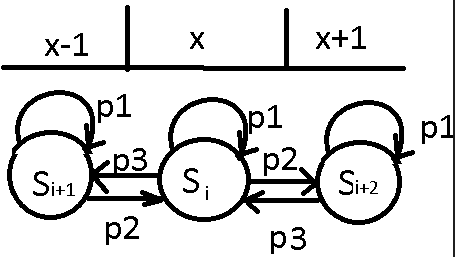

Число возможных состояний при k шагах = $2k+1$ - k шагов влево от $х_0$, k шагов вправо, и сам $х_0$.

- Вероятность отстаться на месте - $p_1$, поэтому на диагоналях матрицы вероятностей переходов будет значение $p_1$.
- Любое перемещение вниз от диагонали (в сторону увеличения абсциссы) происходит с вероятностью $p_2$
- Любое перемещение вверх от диагонали (в сторону уменьшения абсциссы) происходит с вероятностью $p_3$

начальное состояние - $x_0$ задается вектором $p_0 = (0...0, 1, 0...0)$, где суммаре число нулей слева и справа от 1 равно $k$

In [29]:
p0 <- matrix(c(rep(0, times=k), 1, rep(0, times=k)), nrow=1, byrow=T)
P <- matrix(0, nrow = 2*k+1, ncol = 2*k+1)
for (i in 1:(2*k+1)) {
  for (j in 1:(2*k+1)) {
    if (i == j) {
      P[i,j] = p1
    }
    if ((i - j) == 1) {
      P[i,j] = p3
    }
    if ((j - i) == 1) {
      P[i,j] = p2
    }
  }
}
p0;
P

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,] 0    0    0    0    0    0    0    1    0    0     0     0     0     0    
     [,15]
[1,] 0

[,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     
 [1,] 0.3352767 0.5185320 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [2,] 0.1461912 0.3352767 0.5185320 0.0000000 0.0000000 0.0000000 0.0000000
 [3,] 0.0000000 0.1461912 0.3352767 0.5185320 0.0000000 0.0000000 0.0000000
 [4,] 0.0000000 0.0000000 0.1461912 0.3352767 0.5185320 0.0000000 0.0000000
 [5,] 0.0000000 0.0000000 0.0000000 0.1461912 0.3352767 0.5185320 0.0000000
 [6,] 0.0000000 0.0000000 0.0000000 0.0000000 0.1461912 0.3352767 0.5185320
 [7,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.1461912 0.3352767
 [8,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.1461912
 [9,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[10,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[11,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[12,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[13,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[14,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[15,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
      [,8]      [,9]      [,10]     [,11]     [,12]     [,13]     [,14]    
 [1,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [2,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [3,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [4,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [5,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [6,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [7,] 0.5185320 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [8,] 0.3352767 0.5185320 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [9,] 0.1461912 0.3352767 0.5185320 0.0000000 0.0000000 0.0000000 0.0000000
[10,] 0.0000000 0.1461912 0.3352767 0.5185320 0.0000000 0.0000000 0.0000000
[11,] 0.0000000 0.0000000 0.1461912 0.3352767 0.5185320 0.0000000 0.0000000
[12,] 0.0000000 0.0000000 0.0000000 0.1461912 0.3352767 0.5185320 0.0000000
[13,] 0.0000000 0.0000000 0.0000000 0.0000000 0.1461912 0.3352767 0.5185320
[14,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.1461912 0.3352767
[15,] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.1461912
      [,15]    
 [1,] 0.0000000
 [2,] 0.0000000
 [3,] 0.0000000
 [4,] 0.0000000
 [5,] 0.0000000
 [6,] 0.0000000
 [7,] 0.0000000
 [8,] 0.0000000
 [9,] 0.0000000
[10,] 0.0000000
[11,] 0.0000000
[12,] 0.0000000
[13,] 0.0000000
[14,] 0.5185320
[15,] 0.3352767

In [39]:
library(matrixcalc)

Pk <- p0 %*% matrix.power(P,k)

Pk; sum(Pk[(k-m):(k+1+m)])

[,1]         [,2]         [,3]         [,4]        [,5]        [,6]      
[1,] 1.427082e-06 2.291021e-05 0.0001930601 0.001090076 0.004554315 0.01477312
     [,7]       [,8]       [,9]      [,10]     [,11]     [,12]     [,13]    
[1,] 0.03821679 0.07989167 0.1355528 0.1858578 0.2032292 0.1725338 0.1083838
     [,14]      [,15]     
[1,] 0.04561998 0.01007927

[1] 0.8358926

### Статистический эксперимент

In [21]:
Dice3<-function() {
  r = runif(1); dice <- 0; i <- 0
  while ((i < length(p)) & (dice < r)) {
    i <- i + 1
    dice <- dice + p[i]
  }
  return(i)
}

# проверка
table(vapply(
  vector(mode="integer", length = 100),
  function(arg) Dice3(),
  numeric(1)
))/100



   1    2    3 
0.30 0.55 0.15 

In [22]:
exp3 <- function(m, k, N) {
  hit_cnt <- 0
  for (i in 1:N) {
    x <- 0 
    for (i in 1:k) {
      state = Dice3()
      if (state == 2) {
        x = x + 1
      }
      if (state == 3) {
        x = x - 1
      }
    }
    if (abs(x) > m) {
      next
    }
    hit_cnt <- hit_cnt + 1
  }
  return(hit_cnt/N)
}

In [23]:
N <- 5000
exp3(m, k, N)

[1] 0.8334

Результаты совпадают